In [1]:
import LoadAndPreprocessDataset

sd_GSCmdV2/train/follow/14c7b073_nohash_1.wav.npy
sd_GSCmdV2/train/seven/ae5578f4_nohash_0.wav.npy
sd_GSCmdV2/train/up/29fb33da_nohash_1.wav.npy
sd_GSCmdV2/train/five/72e382bd_nohash_0.wav.npy
sd_GSCmdV2/train/backward/3f45a0cf_nohash_2.wav.npy
sd_GSCmdV2/train/two/a1e71565_nohash_3.wav.npy
sd_GSCmdV2/train/five/079d1020_nohash_0.wav.npy
sd_GSCmdV2/train/tree/7f581e94_nohash_0.wav.npy
sd_GSCmdV2/train/backward/1970b130_nohash_0.wav.npy
sd_GSCmdV2/train/right/7d149b38_nohash_0.wav.npy
sd_GSCmdV2/train/seven/5a9f7324_nohash_4.wav.npy
sd_GSCmdV2/train/left/95218ce8_nohash_0.wav.npy
sd_GSCmdV2/train/six/25132942_nohash_0.wav.npy
sd_GSCmdV2/train/left/ddedba85_nohash_3.wav.npy
sd_GSCmdV2/train/two/9ff2d2f4_nohash_3.wav.npy
sd_GSCmdV2/train/seven/adb45ef2_nohash_0.wav.npy
sd_GSCmdV2/train/left/24befdb3_nohash_0.wav.npy
sd_GSCmdV2/train/four/eee5e541_nohash_0.wav.npy
sd_GSCmdV2/train/four/be7a5b2d_nohash_0.wav.npy
sd_GSCmdV2/train/left/de3fe344_nohash_0.wav.npy
sd_GSCmdV2/train/bird/bc065a17_

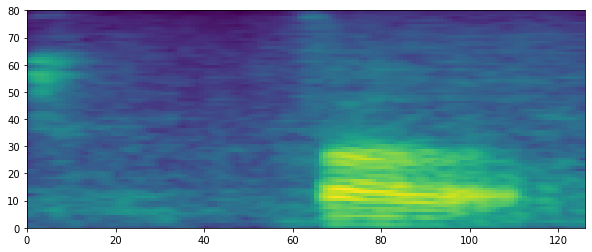

20
17
2
15
20
12
15
20
20
5
17
4
16
4
12
17
4
14
14
4
20
12
20
20
6
17
2
6
13
8
12
11
12
15
11
13
15
20
7
2
6
19
2
0
20
20
12
15
9
4


In [3]:
import time
import matplotlib.pyplot as plt

#Load filenames
train,val,test = LoadAndPreprocessDataset.loadDatasetFilenames(nCategories=21)

#batch_size=len(test)
batch_size=100

start = time.time()
#Load Trainfiles
X,y=LoadAndPreprocessDataset.loadBatch(train,batch_size=batch_size,nCategories=21)
end = time.time()
print("Loading ", batch_size, " files (seconds):", end - start)
print("Size of X:\t%d bytes" % (X.nbytes))
print("Shape of X:\t",X.shape)

start = time.time()
#Extract features
#features=LoadAndPreprocessDataset.MFCC_DELTA_12(X)
features=LoadAndPreprocessDataset.melspect(X)
end = time.time()
print("Transforming ", batch_size, " elements (seconds):", end - start)
print("Size of trasformed: \t%d bytes" % (features.nbytes))
print("Shape of transformed:\t",features.shape)

print(features.shape)
plt.figure(figsize=(10, 4))
plt.pcolormesh(features[0])
plt.show()


In [ ]:
del(X)

In [ ]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(features[10])
plt.show()

In [ ]:
import numpy as np
import librosa # mfcc functions

sr=16000	#Sampling rate of audiofiles


y=np.load("sd_GSCmdV2/test/right/3d86b69a_nohash_2.wav.npy")

print(np.max(y))
print(np.mean(np.abs(y)))

import sounddevice as sd
sd.play(y, sr)

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=1024,
										hop_length=128, power=1.0,
										n_mels=80, fmin=40.0, fmax=sr/2)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y)
plt.xlabel("Samples")
plt.ylabel("Intensity")
plt.xlim(0, len(y))
plt.show()

plt.figure(figsize=(10, 4))
plt.pcolormesh(log_S)
plt.show()

mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=40)
plt.figure(figsize=(10, 4))
plt.pcolormesh(mfcc)
plt.show()